# Autoencoder

## Table of Contents

* 1. Unsupervised Learning

* 2. Autoencoders

* 3. Autoencoder with TensorFlow

  - 3.1. Define a Structure of an Autoencoder
  - 3.2. Define Loss and Optimizer
  - 3.3. Test or Evaluate
* 4.Latent Space and Generation

### 1. Unsupervised Learning

#### Definition

* Unsupervised learning refers to most attempts to extract information from a distribution that do not require human labor to annotate example
* Main task is to find the 'best' representation of the data

#### Dimension Reduction



* Attempt to compress as much information as possible in a smaller representation
* Preserve as much information as possible while obeying some constraint aimed at keeping the representation simpler

### 2. Autoencoders


It is like 'deep learning version' of unsupervised learning.



#### Definition

* An autoencoder is a neural network that is trained to attempt to copy its input to its outpu
* The network consists of two parts: an encoder and a decoder that produce a reconstruction

#### Encoder and Decoder



* Encoder function :  z=f(x)
 
* Decoder function :  x=g(z)
 
* We learn to set  g(f(x))=x

![auto](./figure/AutoEncoder1.png)

![auto2](./figure/AutoEncoder2.png)

### 3. Autoencoder with TensorFlow¶


* MNIST example
* Use only (1, 5, 6) digits to visualize in 2-D

![autoEncoder3](./figure/autoEncoder3.png)

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [4]:
# Load Data

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Check the train and test datasets 
# print(x_train)
# print(.shape)
# print(x_test) 
# print(.shape)

x_train = x_train.reshape((x_train.shape[0],28*28)) / 255
x_test = x_test.reshape((x_test.shape[0],28*28)) / 255

# Check the train and test datasets 
# print(x_train)
# print(.shape)
# print(x_test) 
# print(.shape)

In [5]:
# Use Only 1,5,6 Digits to Visualize

# print(np.where(y_train == 1))
train_idx1 = np.array(np.where(y_train == 1))
train_idx5 = np.array(np.where(y_train == 5))
train_idx6 = np.array(np.where(y_train == 6))
#print(train_idx1)
#print(np.concatenate((train_idx1, train_idx5, train_idx6))
train_idx = np.sort(np.concatenate((train_idx1, train_idx5, train_idx6), axis= None))

The number of training images : 18081, shape : (18081, 784)
The number of testing images : 2985, shape : (2985, 784)


In [ ]:
test_idx1 = np.array(np.where(y_test == 1))
test_idx5 = np.array(np.where(y_test == 5))
test_idx6 = np.array(np.where(y_test == 6))
test_idx = np.sort(np.concatenate((test_idx1, test_idx5, test_idx6), axis= None))


In [ ]:
train_imgs = x_train[train_idx]
train_labels = y_train[train_idx]
test_imgs = x_test[test_idx]
test_labels = y_test[test_idx]


In [ ]:
train_imgs

In [ ]:
test_imgs

In [ ]:
train_imgs.shape

In [ ]:
test_imgs.shape

In [ ]:
n_train = train_imgs.shape[0]
n_test = test_imgs.shape[0]

print ("The number of training images : {}, shape : {}".format(n_train, train_imgs.shape))
print ("The number of testing images : {}, shape : {}".format(n_test, test_imgs.shape))

### 3.1. Define a Structure of an Autoencoder


* Input shape and latent variable shape
* Encoder shape
* Decoder shape

![auto3](./figure/AutoEncoder3.png)

In [10]:
# Define Structure

# Encoder Structure
encoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(500, activation = 'relu', input_shape = (28*28,)),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = None)
    ])

# Decoder Structure
decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(300, activation = 'relu', input_shape = (2,)),
    tf.keras.layers.Dense(500, activation = 'relu'),
    # tf.keras.layers.Dense(, activation = None) # 28*28
    ])

# Autoencoder = Encoder + Decoder
autoencoder = tf.keras.models.Sequential([encoder, decoder])

### 3.2. Define Loss and Optimizer


Loss

* Squared loss


$$
L = \frac{1}{m} \sum_{i=1}^m (t_i - y_i)^2
$$

Optimizer

* AdamOptimizer: the most popular optimizer


In [11]:
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                    loss = 'mean_squared_error',
                    metrics = ['mse'])

In [12]:
# Train Model & Evaluate Test Data

n_batch = 50
n_epoch = 10

training = autoencoder.fit(train_imgs, train_imgs, batch_size = n_batch, epochs = n_epoch)

Epoch 1/10
362/362 [==============================] - 1s 3ms/step - loss: 0.0464 - mse: 0.0464
Epoch 2/10
362/362 [==============================] - 1s 3ms/step - loss: 0.0309 - mse: 0.0309
Epoch 3/10
362/362 [==============================] - 1s 3ms/step - loss: 0.0291 - mse: 0.0291
Epoch 4/10
362/362 [==============================] - 1s 3ms/step - loss: 0.0279 - mse: 0.0279
Epoch 5/10
362/362 [==============================] - 1s 4ms/step - loss: 0.0273 - mse: 0.0273
Epoch 6/10
362/362 [==============================] - 1s 3ms/step - loss: 0.0270 - mse: 0.0270
Epoch 7/10
362/362 [==============================] - 1s 3ms/step - loss: 0.0265 - mse: 0.0265
Epoch 8/10
362/362 [==============================] - 1s 3ms/step - loss: 0.0261 - mse: 0.0261
Epoch 9/10
362/362 [==============================] - 1s 3ms/step - loss: 0.0261 - mse: 0.0261
Epoch 10/10
362/362 [==============================] - 1s 3ms/step - loss: 0.0258 - mse: 0.0258


In [13]:
test_scores = autoencoder.evaluate(test_imgs, test_imgs, verbose = 2)
print('Test loss: {}'.format(test_scores[0]))
print('Mean Squared Error: {} %'.format(test_scores[1]*100))

94/94 - 0s - loss: 0.0262 - mse: 0.0262
Test loss: 0.02618781290948391
Mean Squared Error: 2.618781290948391 %


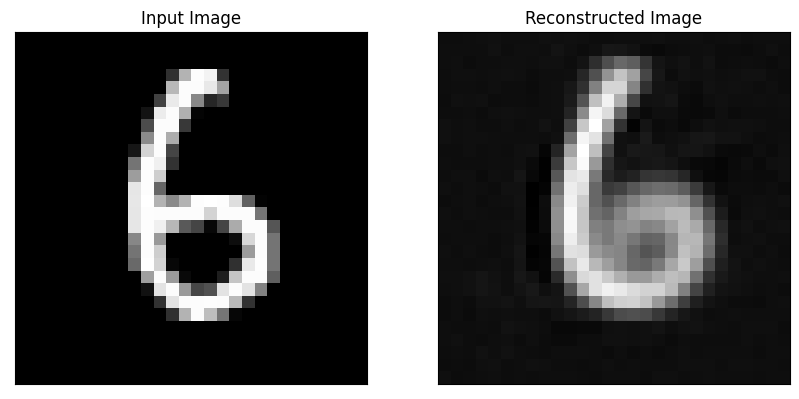

In [14]:
# Visualize Evaluation on Test Data

# rand_idx = np.random.randint(1, test_imgs.shape[0])
rand_idx = 6

test_img = test_imgs[rand_idx]
reconst_img = autoencoder.predict(test_img.reshape(1,28*28))

plt.figure(figsize = (10, 8))
plt.subplot(1,2,1)
plt.imshow(test_img.reshape(28,28), 'gray')
plt.title('Input Image', fontsize = 12)

plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(reconst_img.reshape(28,28), 'gray')
plt.title('Reconstructed Image', fontsize = 12)
plt.xticks([])
plt.yticks([])

plt.show()

### 4. Latent Space and Generation


* To see the distribution of latent variables, we make a projection of 784-dimensional image space onto 2-dimensional latent space


In [15]:
idx = np.random.randint(0, len(test_labels), 500)
test_x, test_y = test_imgs[idx], test_labels[idx]

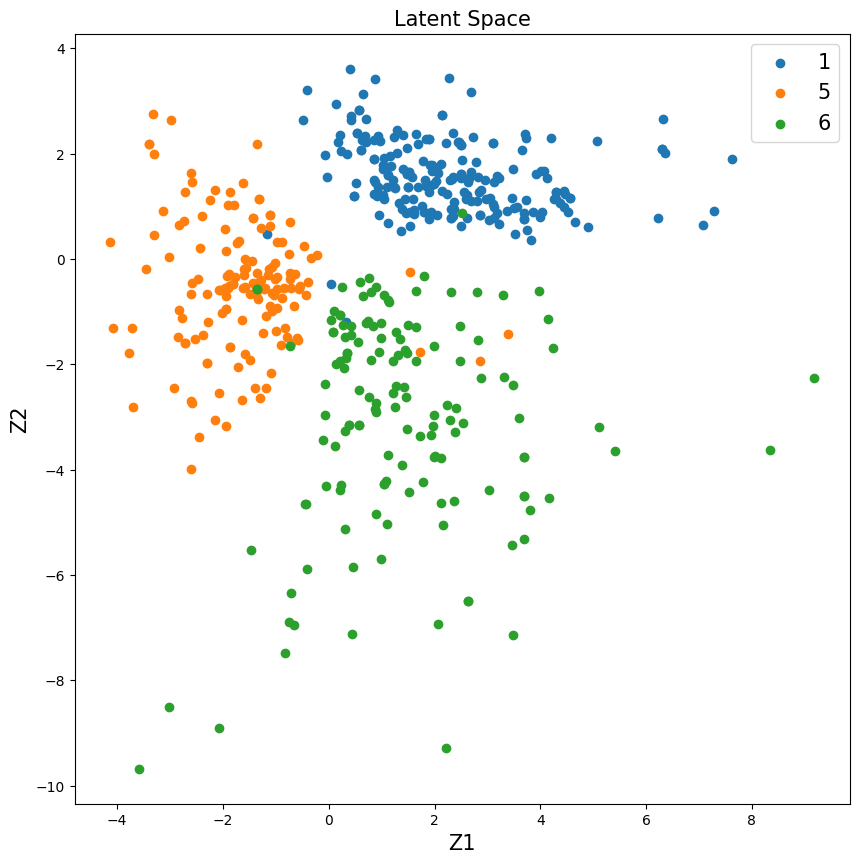

In [16]:
test_latent = encoder.predict(test_x)

plt.figure(figsize = (10,10))
plt.scatter(test_latent[test_y == 1,0], test_latent[test_y == 1,1], label = '1')
plt.scatter(test_latent[test_y == 5,0], test_latent[test_y == 5,1], label = '5')
plt.scatter(test_latent[test_y == 6,0], test_latent[test_y == 6,1], label = '6')
plt.title('Latent Space', fontsize=15)
plt.xlabel('Z1', fontsize=15)
plt.ylabel('Z2', fontsize=15)
plt.legend(fontsize = 15)
plt.axis('equal')
plt.show()

**Data Generation**

* It generates something that makes sense.

* These results are unsatisfying, because the density model used on the latent space ℱ is too simple and inadequate.

* Building a “good” model amounts to our original problem of modeling an empirical distribution, although it may now be in a lower dimension space.

* This is a motivation to VAE or GAN.

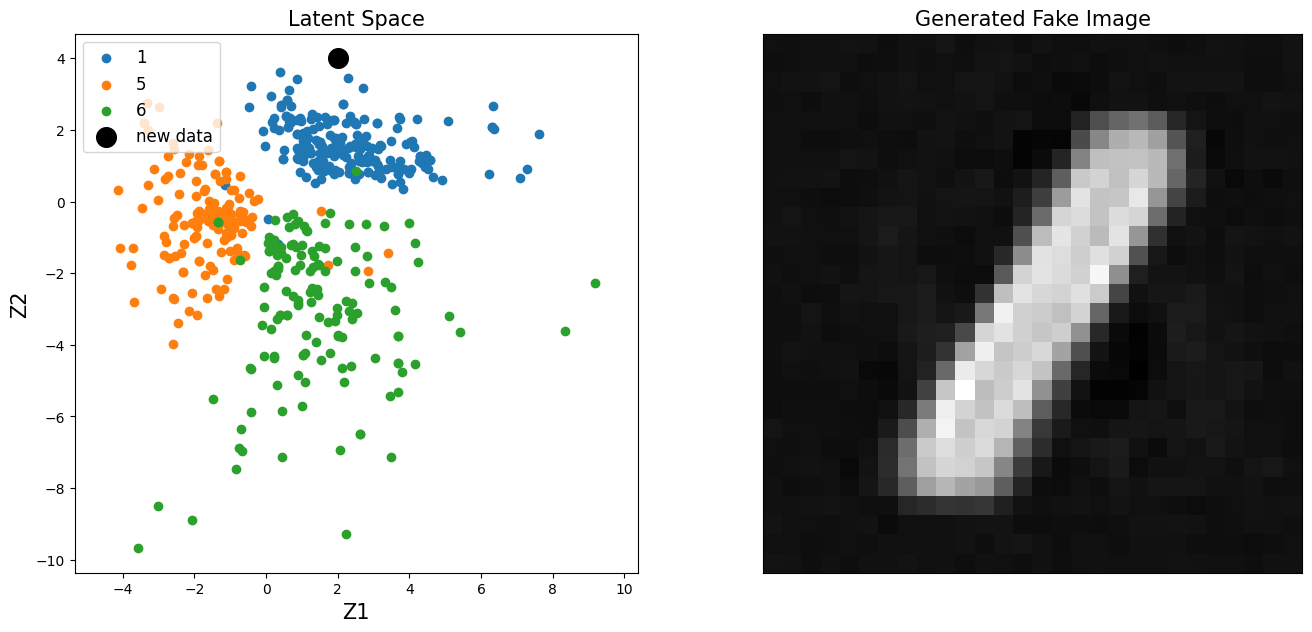

In [18]:
new_data = np.array([[2, 4]])

fake_image = decoder.predict(new_data)

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.scatter(test_latent[test_y == 1,0], test_latent[test_y == 1,1], label = '1')
plt.scatter(test_latent[test_y == 5,0], test_latent[test_y == 5,1], label = '5')
plt.scatter(test_latent[test_y == 6,0], test_latent[test_y == 6,1], label = '6')
plt.scatter(new_data[:,0], new_data[:,1], c = 'k', marker = 'o', s = 200, label = 'new data')
plt.title('Latent Space', fontsize = 15)
plt.xlabel('Z1', fontsize = 15)
plt.ylabel('Z2', fontsize = 15)
plt.legend(loc = 2, fontsize = 12)
plt.axis('equal')
plt.subplot(1,2,2)
plt.imshow(fake_image.reshape(28,28), 'gray')
plt.title('Generated Fake Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()